In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [39]:
def clear(data):
    data['humidity'] = None
    data['meantemp'] = None
    data['meanpressure'] = None

In [40]:
data_start = pd.read_csv('https://raw.githubusercontent.com/mansurik1/MLT/master/LW%206/Project/data/DailyDelhiClimateTrain.csv', header=0, index_col=0, parse_dates=True)

clear(data_start)

data_test = pd.read_csv('https://raw.githubusercontent.com/mansurik1/MLT/master/LW%206/Project/data/DailyDelhiClimateTest.csv', header=0, index_col=0, parse_dates=True)
clear(data_test)

data_train = data_start['wind_speed']

In [41]:
data_train.head()

date
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
Name: wind_speed, dtype: float64

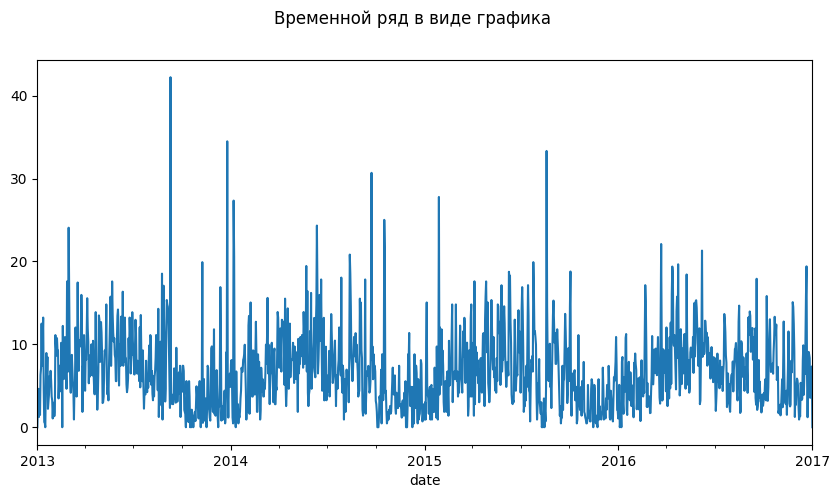

In [42]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
data_train.plot(ax=ax, legend=False)
pyplot.show()

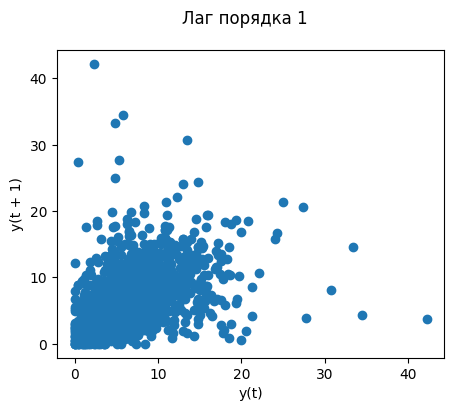

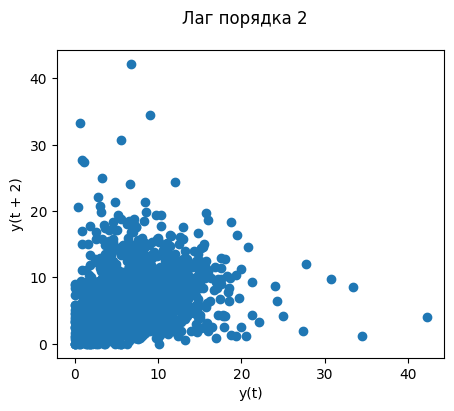

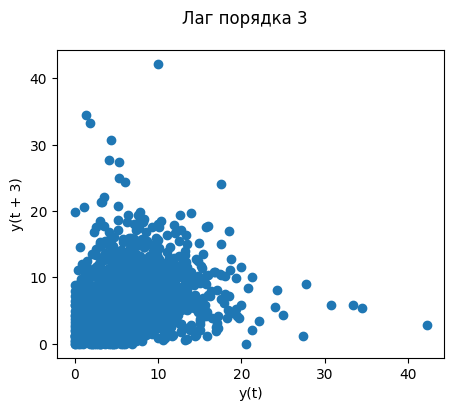

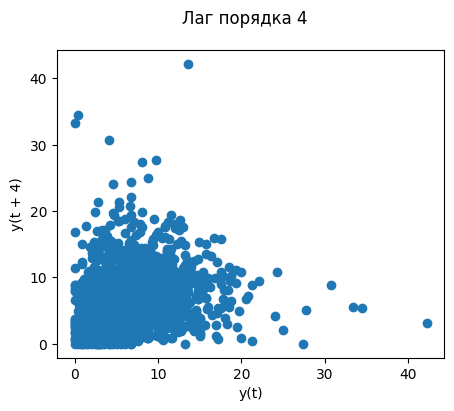

In [43]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(data_train, lag=i, ax=ax)
    pyplot.show()

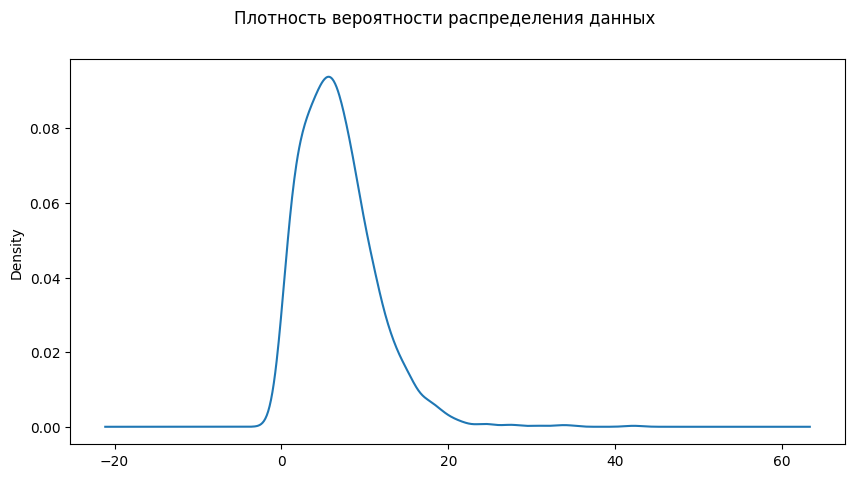

In [44]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
data_train.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

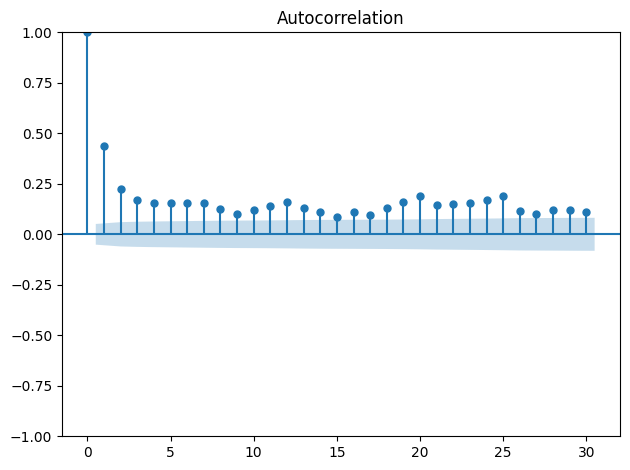

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_train, lags=30)
plt.tight_layout()

In [46]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
from statsmodels.tsa.seasonal import seasonal_decompose
# Аддитивная модель
def plot_decompose(data=data_train, model='add'):
    result_add = seasonal_decompose(data, model = 'add')
    fig = result_add.plot()
    fig.set_size_inches((12, 8))
    # Перерисовка
    fig.tight_layout()
    plt.show()

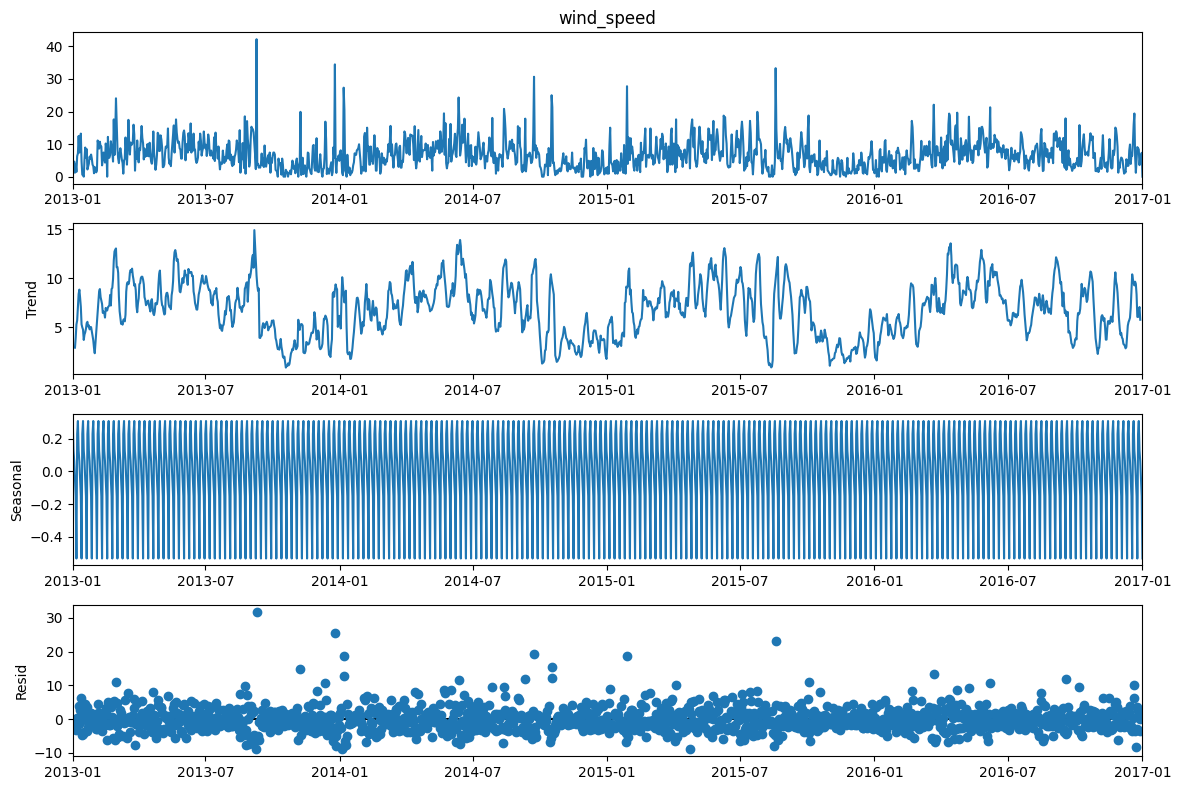

In [47]:
plot_decompose()

           meantemp humidity  wind_speed meanpressure    SMA_10    SMA_20
date                                                                     
2013-01-01     None     None    0.000000         None  0.000000  0.000000
2013-01-02     None     None    2.980000         None  1.490000  1.490000
2013-01-03     None     None    4.633333         None  2.537778  2.537778
2013-01-04     None     None    1.233333         None  2.211667  2.211667
2013-01-05     None     None    3.700000         None  2.509333  2.509333
...             ...      ...         ...          ...       ...       ...
2016-12-28     None     None    3.547826         None  8.812007  7.059632
2016-12-29     None     None    6.000000         None  8.370578  7.294007
2016-12-30     None     None    6.266667         None  7.404578  7.339562
2016-12-31     None     None    7.325000         None  6.196602  7.469979
2017-01-01     None     None    0.000000         None  5.578507  7.305888

[1462 rows x 6 columns]


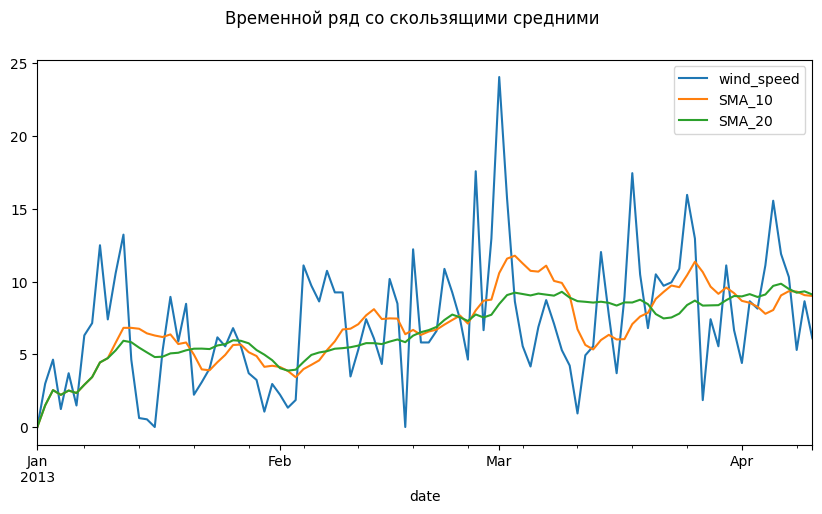

In [48]:
data_train2 = data_start.copy()

# Простое скользящее среднее (SMA)
data_train2['SMA_10'] = data_train2['wind_speed'].rolling(10, min_periods=1).mean()
data_train2['SMA_20'] = data_train2['wind_speed'].rolling(20, min_periods=1).mean()

print(data_train2)

fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
data_train2[:100].plot(ax=ax, legend=True)
pyplot.show()


In [49]:
!pip install gplearn
from gplearn.genetic import SymbolicRegressor
xnum = list(range(data_train.shape[0]))
print(data_train)

function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=2000, metric='mse',
                               generations=40, stopping_criteria=0.01,
                               init_depth=(5, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
date
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Name: wind_speed, Length: 1462, dtype: float64


In [50]:
est_gp.fit(np.array(xnum).reshape(-1, 1), data_train.values.reshape(-1, 1))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0   294.65      3.43568e+75       39           28.775              N/A     20.76m
   1   135.82      3.19696e+25      131          25.5958              N/A      3.93m
   2   159.02      1.79551e+16       35          21.6531              N/A      4.63m
   3    68.28      8.82506e+20       34           20.999              N/A      1.85m
   4    76.76      1.88909e+14       59          20.7797              N/A      1.95m
   5    65.55      9.55628e+09       59          20.7797              N/A      1.73m
   6    56.12      4.01907e+09       94          20.6542              N/A      2.07m
   7    51.32      1.56172e+16       61          20.6325              N/A      1.46m
   8    50.71      4.52328e+09      105          20.6237              N/A      1.40m
   9    81.51      6.72112e+11       68           19.873              N/A      1.82m
  10    86.33      3.27189e+09       67          19.5566              N/A      2.29m
  11    79.85      4.59394e+06       65          19.4868         

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=40, init_depth=(5, 10), metric='mse',
                  population_size=2000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

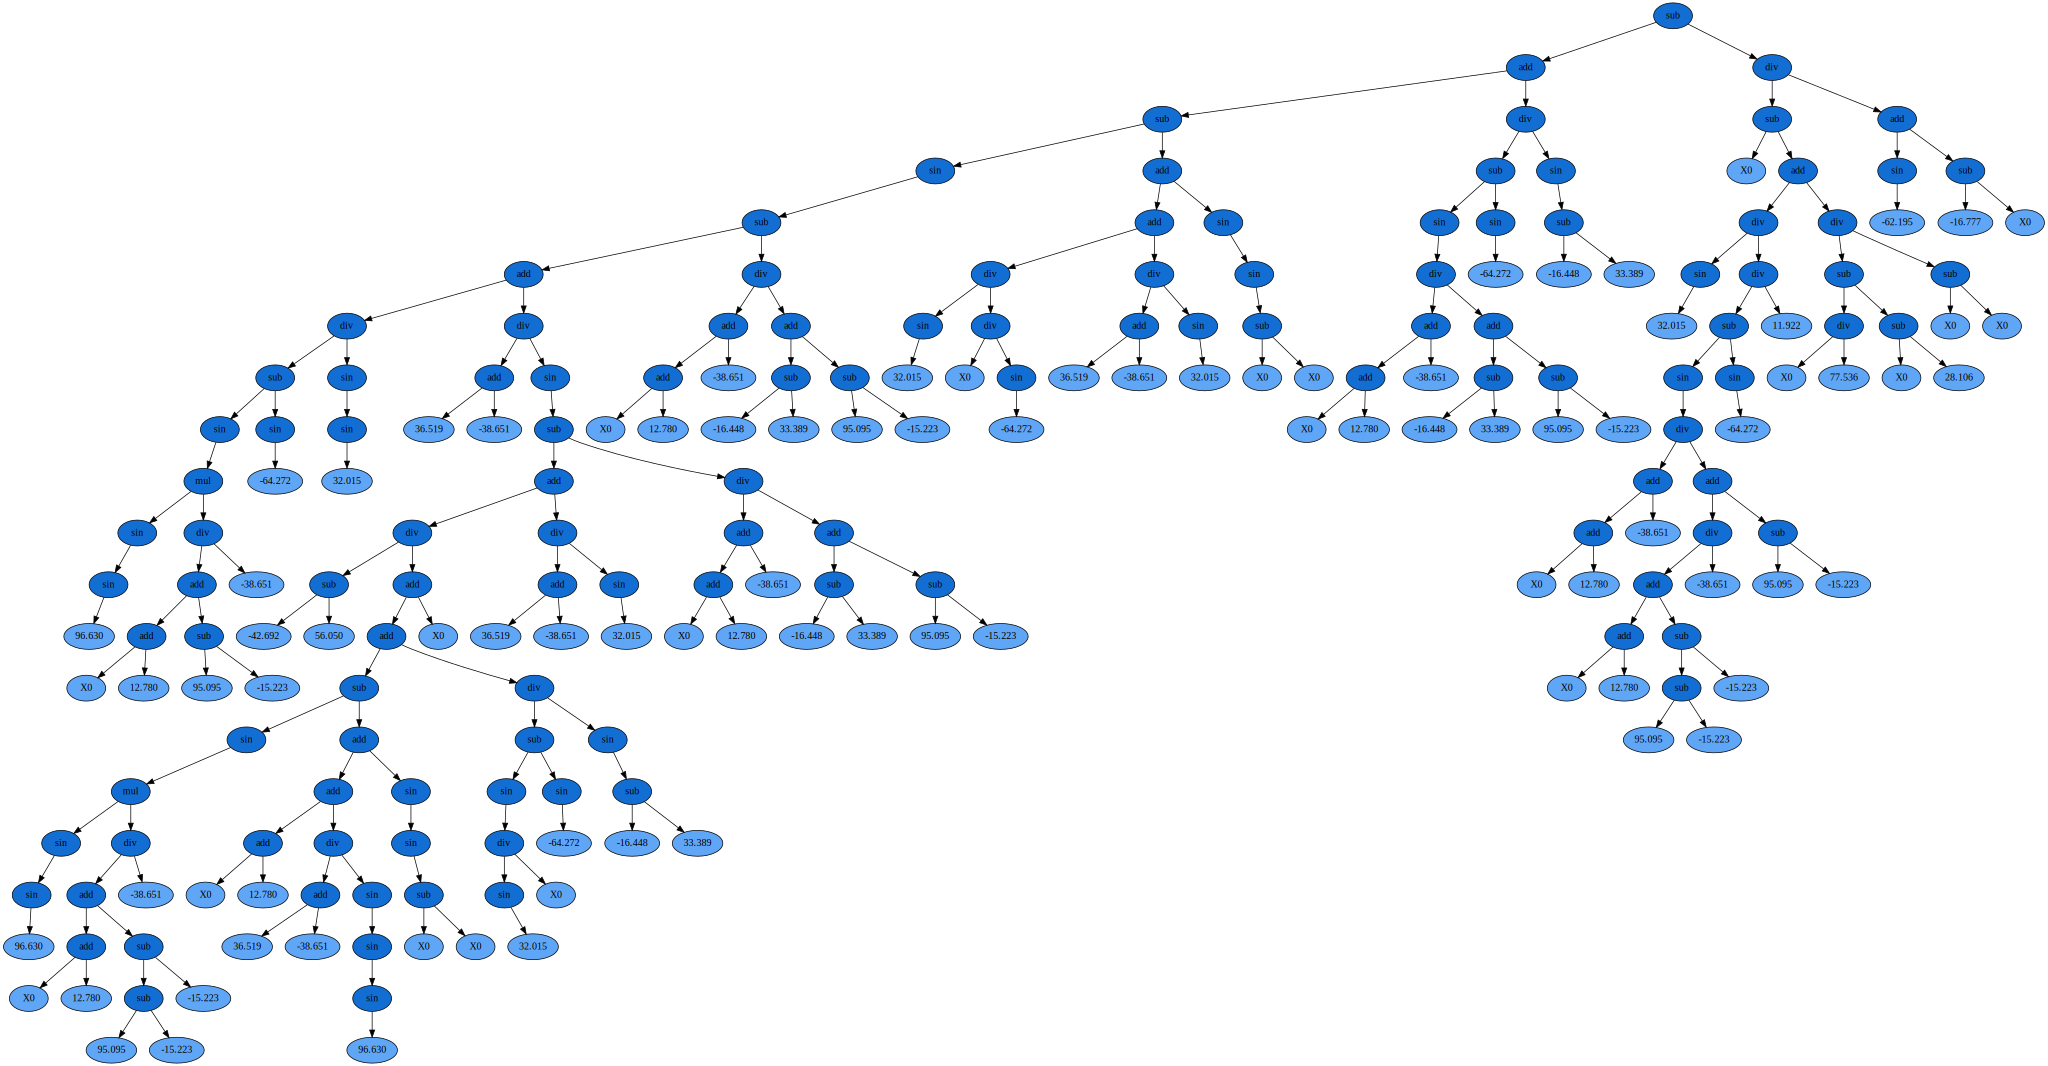

In [51]:
import graphviz
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [52]:
# Записываем предсказания в DataFrame
data_test['predictions_GPLEARN'] = list(y_gp)

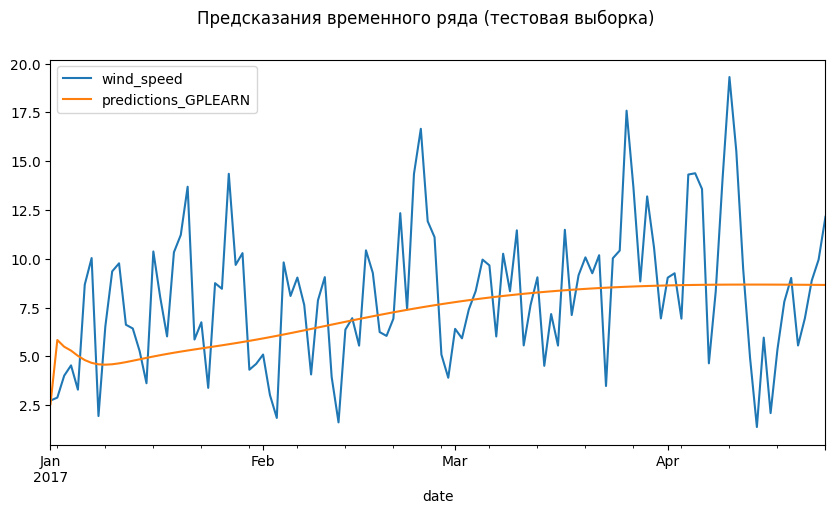

In [53]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
data_test.plot(ax=ax, legend=True)
pyplot.show()

In [54]:
# Целочисленная метка шкалы времени
xnum = list(range(data_start.shape[0] + data_test.shape[0]))
# Разделение выборки на обучающую и тестовую
train_size = len(data_start)
train, test = data_start['wind_speed'].values, data_test['wind_speed'].values
history_arima = [x for x in train]
history_es = [x for x in train]

print(train)
print(test)

[0.         2.98       4.63333333 ... 6.26666667 7.325      0.        ]
[ 2.74347826  2.89444444  4.01666667  4.545       3.3         8.68181818
 10.04166667  1.95        6.54285714  9.36111111  9.77222222  6.62631579
  6.43529412  5.276       3.63043478 10.38        8.03888889  6.02916667
 10.33809524 11.22631579 13.69565217  5.868       6.75294118  3.39130435
  8.756       8.46785714 14.35833333  9.69090909 10.29444444  4.32222222
  4.625       5.1         3.02727273  1.85454545  9.82        8.1
  9.04444444  7.6375      4.08        7.875       9.06666667  3.95
  1.625       6.37777778  6.9625      5.55714286 10.4375      9.28
  6.25        6.05454545  6.9375     12.34166667  7.4125     14.35
 16.6625     11.92857143 11.1125      5.1         3.91111111  6.41538462
  5.93        7.4125      8.35        9.9625      9.66666667  6.025
 10.26363636  8.34285714 11.4625      5.56666667  7.6375      9.05555556
  4.52222222  7.175       5.56       11.49        7.12307692  9.16111111
 10.07777

In [55]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Параметры модели (p,d,q)
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE

In [56]:
mean_squared_error(test, predictions_arima, squared=False)

3.3452863559924984

In [57]:
data_test['predictions_ARIMA'] = list(predictions_arima)

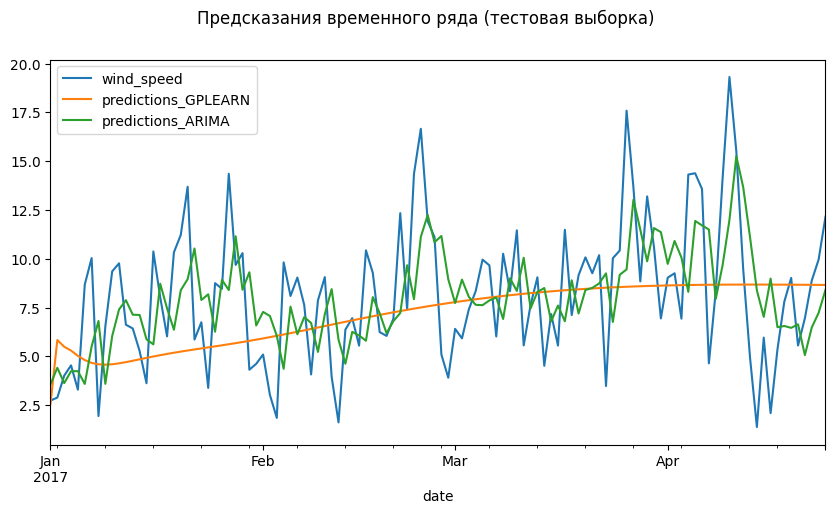

In [58]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
data_test.plot(ax=ax, legend=True)
pyplot.show()